# Desafio 1 - Maratona Behind the Code 2021

Realizaremos uma tarefa de mineração **preditiva**, pois com base em casos de empréstimos pré existentes vamos predizer qual a melhor decisão a ser tomada para novos empréstimos solicitados.


A variável alvo, ALLOW é do tipo **discreto** e recebe os valores:

        0 - FALSE;

        1 - TRUE;

Portanto temos um modelo preditivo de classificação

## Exploração do dataset

O primeiro passo para o desenvolvimento de um bom modelo de Machine Learning é explorar bem os dados que temos para trabalhar. Devemos entender o melhor possível a relevância de cada dado para o valor que queremos predizer. Afinal, a predição do modelo é inteiramente baseada nos dados com que treinou.

Existem muitas bibliotecas em Python que podem ser utilizadas para tratamento e visualização de dados. Nesses exemplos, vamos usar Pandas, Seaborn e Matplotlib.

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from pathlib import Path

### Declaração de variáveis

In [2]:
seed: int = 0
test_size = 500

target = "ALLOW"

### Carregamento dos dados

In [29]:
data_path: Path = Path("../assets/data/")

answers = pd.read_csv(data_path / "ANSWERS.csv")
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   int64 
 1   CHECKING_BALANCE            1000 non-null   object
 2   PAYMENT_TERM                1000 non-null   int64 
 3   CREDIT_HISTORY              1000 non-null   object
 4   LOAN_PURPOSE                1000 non-null   object
 5   LOAN_AMOUNT                 1000 non-null   int64 
 6   EXISTING_SAVINGS            1000 non-null   object
 7   EMPLOYMENT_DURATION         1000 non-null   int64 
 8   INSTALLMENT_PERCENT         1000 non-null   int64 
 9   SEX                         1000 non-null   object
 10  OTHERS_ON_LOAN              1000 non-null   object
 11  CURRENT_RESIDENCE_DURATION  1000 non-null   int64 
 12  PROPERTY                    1000 non-null   object
 13  AGE                         1000 non-null   int64

A variável alvo é a `ALLOW`, significando se um empréstimo deverá ser permitido ou não, baseado nas informações dadas.

In [36]:

accounts = pd.read_csv(data_path / "ACCOUNTS.csv", index_col="ID")
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 291655 to 5547
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CHECKING_BALANCE        2467 non-null   object 
 1   CREDIT_HISTORY          2462 non-null   object 
 2   EXISTING_SAVINGS        2467 non-null   object 
 3   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), object(3)
memory usage: 96.8+ KB


In [35]:

demographics = pd.read_csv(data_path / "DEMOGRAPHICS.csv", index_col="ID")
demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 24252 to 5547
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         3920 non-null   object 
 1   AGE                         3918 non-null   float64
 2   JOB_TYPE                    3910 non-null   float64
 3   DEPENDENTS                  3915 non-null   float64
 4   TELEPHONE                   3915 non-null   float64
 5   FOREIGN_WORKER              3909 non-null   float64
 6   EMPLOYMENT_DURATION         3923 non-null   float64
 7   PROPERTY                    3918 non-null   object 
 8   HOUSING                     3912 non-null   object 
 9   CURRENT_RESIDENCE_DURATION  3917 non-null   float64
dtypes: float64(7), object(3)
memory usage: 338.2+ KB


In [34]:

loans = pd.read_csv(data_path / "LOANS.csv", index_col="ID")
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 610339 to 5547
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAYMENT_TERM         3975 non-null   float64
 1   INSTALLMENT_PLANS    3978 non-null   object 
 2   INSTALLMENT_PERCENT  3974 non-null   float64
 3   LOAN_PURPOSE         3979 non-null   object 
 4   LOAN_AMOUNT          3981 non-null   float64
 5   OTHERS_ON_LOAN       3977 non-null   object 
 6   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 249.9+ KB


#### Concatenação dos dados para um único dataset

In [45]:
df_all = pd.concat([accounts, demographics, loans], axis=1).reset_index()[answers.columns]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3999 non-null   int64  
 1   CHECKING_BALANCE            2467 non-null   object 
 2   PAYMENT_TERM                3975 non-null   float64
 3   CREDIT_HISTORY              2462 non-null   object 
 4   LOAN_PURPOSE                3979 non-null   object 
 5   LOAN_AMOUNT                 3981 non-null   float64
 6   EXISTING_SAVINGS            2467 non-null   object 
 7   EMPLOYMENT_DURATION         3923 non-null   float64
 8   INSTALLMENT_PERCENT         3974 non-null   float64
 9   SEX                         3920 non-null   object 
 10  OTHERS_ON_LOAN              3977 non-null   object 
 11  CURRENT_RESIDENCE_DURATION  3917 non-null   float64
 12  PROPERTY                    3918 non-null   object 
 13  AGE                         3918 

#### Verificação de valores faltantes

<Axes: >

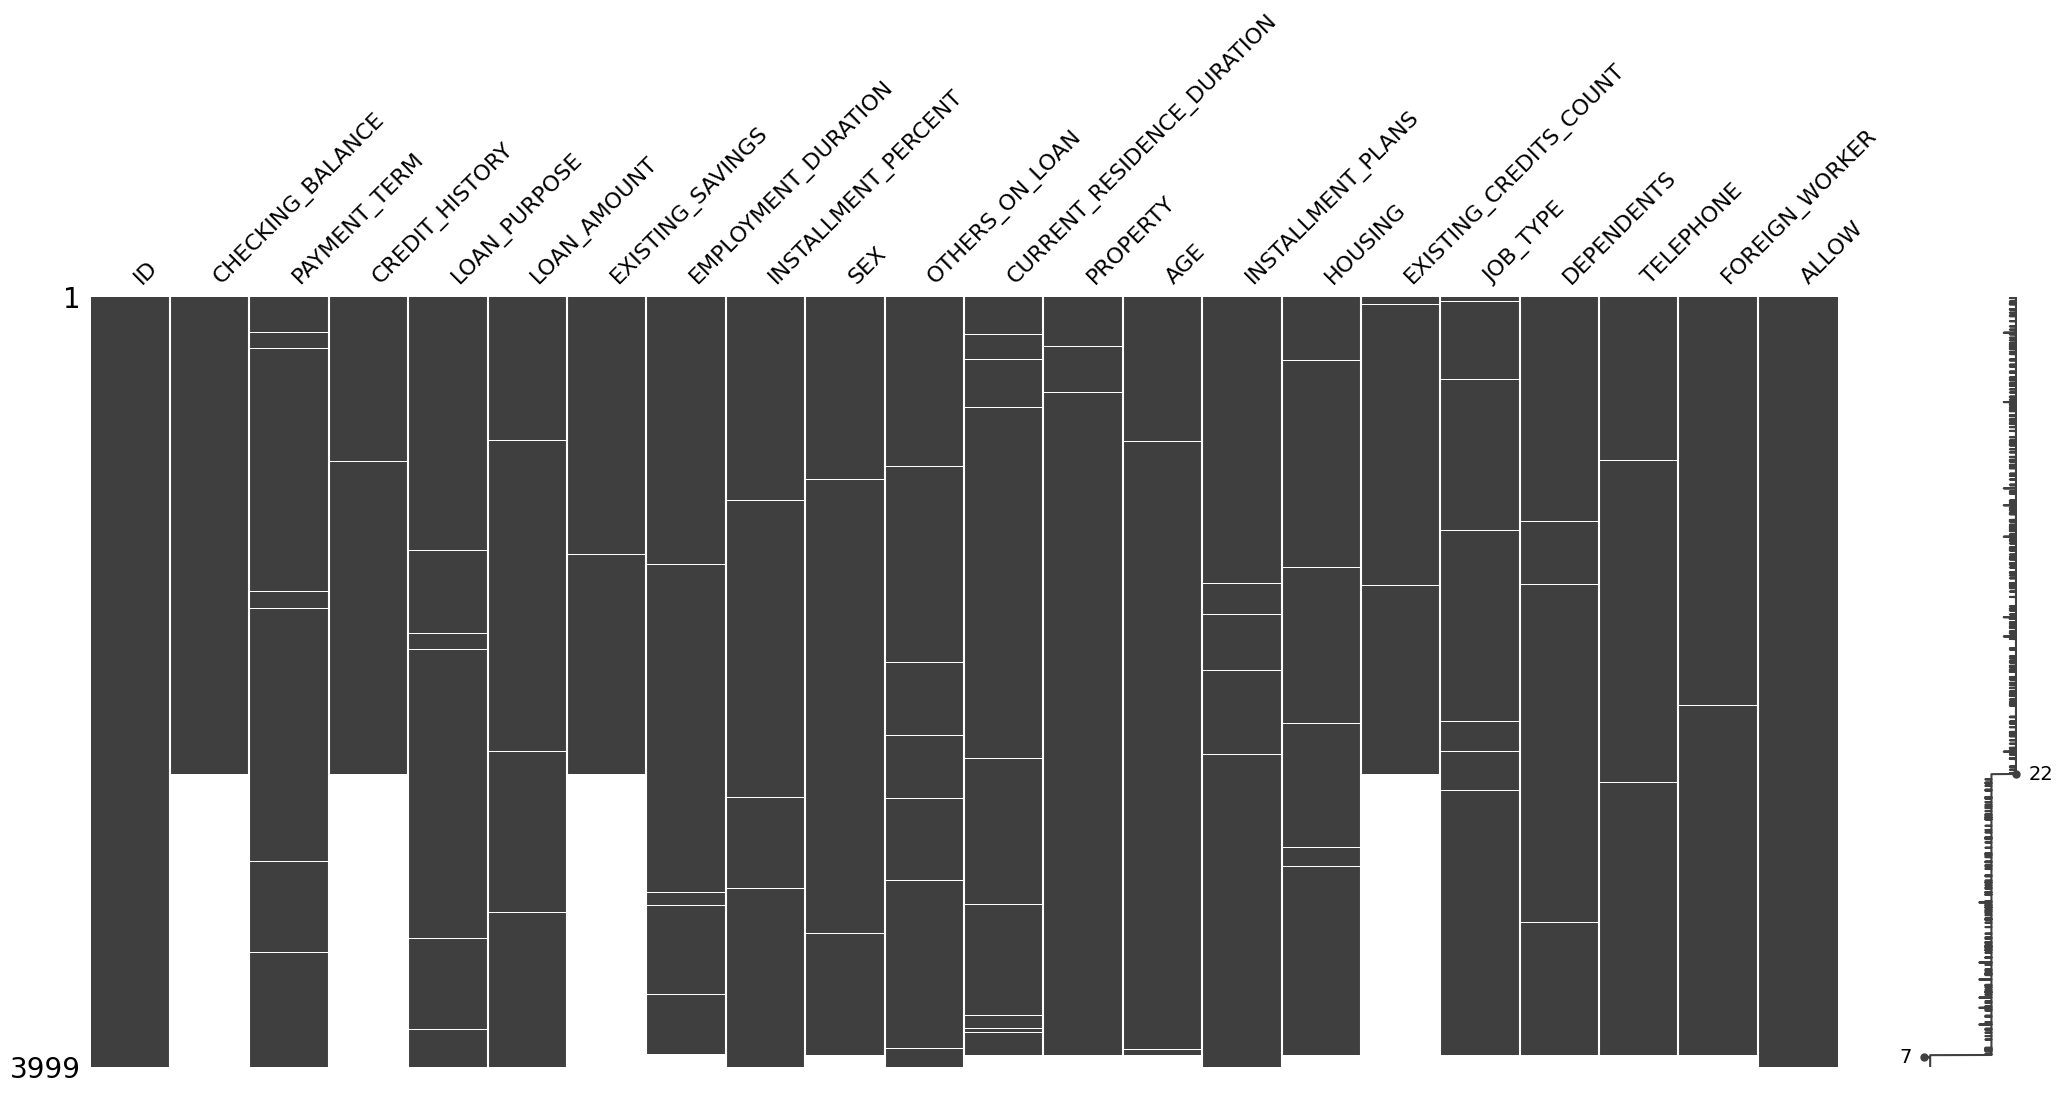

In [46]:
import missingno as msno
msno.matrix(df_all)

In [2]:
from plotnine import ggplot, aes, geom_boxplot

# (
#   ggplot(df_all)
#   + aes(x="ALLOW", y="????")
#   + geom_boxplot()
# )

### Treino X Teste

Antes de explorar os dados, vamos separar o dataset em dados de teste, que não serão vistos durante a análise ou modelagem dos dados, e dados de treino que usaremos tanto para a análise exploratória quanto para o treino.

In [8]:
df_train, df_test = train_test_split(df_all, test_size=test_size, random_state=seed, stratify=df_all[[target]])

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 3766 to 137
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3749 non-null   int64  
 1   CHECKING_BALANCE            2318 non-null   object 
 2   PAYMENT_TERM                3726 non-null   float64
 3   CREDIT_HISTORY              2313 non-null   object 
 4   LOAN_PURPOSE                3730 non-null   object 
 5   LOAN_AMOUNT                 3731 non-null   float64
 6   EXISTING_SAVINGS            2318 non-null   object 
 7   EMPLOYMENT_DURATION         3677 non-null   float64
 8   INSTALLMENT_PERCENT         3726 non-null   float64
 9   SEX                         3678 non-null   object 
 10  OTHERS_ON_LOAN              3727 non-null   object 
 11  CURRENT_RESIDENCE_DURATION  3673 non-null   float64
 12  PROPERTY                    3672 non-null   object 
 13  AGE                         367

In [10]:

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1144 to 1203
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          250 non-null    int64  
 1   CHECKING_BALANCE            149 non-null    object 
 2   PAYMENT_TERM                249 non-null    float64
 3   CREDIT_HISTORY              149 non-null    object 
 4   LOAN_PURPOSE                249 non-null    object 
 5   LOAN_AMOUNT                 250 non-null    float64
 6   EXISTING_SAVINGS            149 non-null    object 
 7   EMPLOYMENT_DURATION         246 non-null    float64
 8   INSTALLMENT_PERCENT         248 non-null    float64
 9   SEX                         242 non-null    object 
 10  OTHERS_ON_LOAN              250 non-null    object 
 11  CURRENT_RESIDENCE_DURATION  244 non-null    float64
 12  PROPERTY                    246 non-null    object 
 13  AGE                         246

### Distribuição dos dados

Allow é uma variável categórica com a seguinte distribuição:

In [11]:
df_train[target].value_counts()

1    2490
0    1259
Name: ALLOW, dtype: int64

In [12]:
with pd.option_context("display.max_columns", None):
    display(df_train.describe(exclude="O"))

,ID,PAYMENT_TERM,LOAN_AMOUNT,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,CURRENT_RESIDENCE_DURATION,AGE,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
count,3.749000e+03,3726.000000,3731.000000,3677.000000,3726.000000,3673.000000,3672.000000,2314.000000,3665.000000,3670.000000,3669.000000,3664.000000,3749.000000
mean,6.611205e+05,654.662641,3478.057893,4.239054,2.983629,2.865233,35.960512,1.470182,2.433015,1.161308,0.412646,0.975437,0.664177
std,3.729009e+05,339.809083,2493.684544,3.598863,1.120163,1.120988,10.613454,0.569601,0.931878,0.367865,0.492377,0.154811,0.472340
min,9.800000e+01,120.000000,250.000000,0.000000,1.000000,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.397430e+05,390.000000,1331.000000,1.000000,2.000000,2.000000,28.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,6.692450e+05,651.000000,3237.000000,4.000000,3.000000,3.000000,36.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,9.796080e+05,900.000000,5312.000000,7.000000,4.000000,4.000000,44.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,1.320082e+06,1984.000000,11676.000000,18.000000,6.000000,6.000000,74.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [13]:
categorical_features = [
    "CREDIT_HISTORY",
    "LOAN_PURPOSE",
    "SEX",
    "OTHERS_ON_LOAN",
    "PROPERTY",
    "INSTALLMENT_PLANS",
    "HOUSING",
    "TELEPHONE",
    "FOREIGN_WORKER",
    "JOB_TYPE",
]

numeric_features = [
    "CHECKING_BALANCE",
    "PAYMENT_TERM",
    "LOAN_AMOUNT",
    "EXISTING_SAVINGS",
    "EMPLOYMENT_DURATION",
    "INSTALLMENT_PERCENT",
    "CURRENT_RESIDENCE_DURATION",
    "AGE",
    "EXISTING_CREDITS_COUNT",
    "DEPENDENTS",
]